In [4]:
# Initialize Otter
import otter
grader = otter.Notebook("ds701-fa24-midterm.ipynb")

# NBA Shot Data Midterm Challenge

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

if not os.path.exists("./datasets"):
    os.makedirs("./datasets")
    os.system("unzip ./archive.zip -d ./datasets")

datasets = sorted(os.listdir("./datasets"))
print(datasets)

['.DS_Store', 'test.csv', 'train.csv']


You have the following datasets in the ./datasets directory:

* train.csv
* test.csv

For questions 1, 2, and 4, work with the `train.csv` file. Use both `train.csv` and `test.csv` for question 3 (the prediction task).

## Part 1: Exploratory analysis, visualization and outlier detection.


Please answer the following seven questions.

### Looking at data and a little prelim analysis

In [6]:
df = pd.read_csv("./datasets/train.csv")

In [7]:
df.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2021.0,2020-21,1.610613e+09,Charlotte Hornets,1628998.0,Cody Martin,F,SF,04-28-2021,22000936.0,BOS,CHA,True,Tip Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.775,0.0,2.0,11.0,27.0
1,2015.0,2014-15,1.610613e+09,San Antonio Spurs,2225.0,Tony Parker,G,PG,NaN,21400159.0,CLE,SAS,False,Jump Shot,2PT Field Goal,Mid-Range,Right Side,R,8-16 ft.,NaN,NaN,12.0,2.0,8.0,32.0
2,2012.0,2011-12,1.610613e+09,Oklahoma City Thunder,201935.0,James Harden,G,SG,01-10-2012,21100137.0,MEM,OKC,False,Jump Shot,2PT Field Goal,Mid-Range,Right Side,R,16-24 ft.,-21.1,8.550,21.0,4.0,7.0,41.0
3,2014.0,2013-14,1.610613e+09,Sacramento Kings,203463.0,Ben McLemore,G,SG,11-15-2013,21300135.0,SAC,DET,False,Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,0.7,7.450,2.0,1.0,5.0,14.0
4,2011.0,2010-11,1.610613e+09,Milwaukee Bucks,2422.0,John Salmons,G,SG,NaN,21000833.0,MIL,DEN,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.1,3.350,23.0,3.0,1.0,29.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385009 entries, 0 to 3385008
Data columns (total 25 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SEASON_1        float64
 1   SEASON_2        object 
 2   TEAM_ID         float64
 3   TEAM_NAME       object 
 4   PLAYER_ID       float64
 5   PLAYER_NAME     object 
 6   POSITION_GROUP  object 
 7   POSITION        object 
 8   GAME_DATE       object 
 9   GAME_ID         float64
 10  HOME_TEAM       object 
 11  AWAY_TEAM       object 
 12  SHOT_MADE       bool   
 13  ACTION_TYPE     object 
 14  SHOT_TYPE       object 
 15  BASIC_ZONE      object 
 16  ZONE_NAME       object 
 17  ZONE_ABB        object 
 18  ZONE_RANGE      object 
 19  LOC_X           float64
 20  LOC_Y           float64
 21  SHOT_DISTANCE   float64
 22  QUARTER         float64
 23  MINS_LEFT       float64
 24  SECS_LEFT       float64
dtypes: bool(1), float64(10), object(14)
memory usage: 623.0+ MB


In [9]:
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'], errors='coerce')  
df['PLAYER_ID'] = df['PLAYER_ID'].astype('int', errors='ignore')  
df['TEAM_ID'] = df['TEAM_ID'].astype('int', errors='ignore')  

In [10]:
df.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2021.0,2020-21,1610612766,Charlotte Hornets,1628998,Cody Martin,F,SF,2021-04-28,22000936.0,BOS,CHA,True,Tip Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.775,0.0,2.0,11.0,27.0
1,2015.0,2014-15,1610612759,San Antonio Spurs,2225,Tony Parker,G,PG,NaT,21400159.0,CLE,SAS,False,Jump Shot,2PT Field Goal,Mid-Range,Right Side,R,8-16 ft.,NaN,NaN,12.0,2.0,8.0,32.0
2,2012.0,2011-12,1610612760,Oklahoma City Thunder,201935,James Harden,G,SG,2012-01-10,21100137.0,MEM,OKC,False,Jump Shot,2PT Field Goal,Mid-Range,Right Side,R,16-24 ft.,-21.1,8.550,21.0,4.0,7.0,41.0
3,2014.0,2013-14,1610612758,Sacramento Kings,203463,Ben McLemore,G,SG,2013-11-15,21300135.0,SAC,DET,False,Dunk Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,0.7,7.450,2.0,1.0,5.0,14.0
4,2011.0,2010-11,1610612749,Milwaukee Bucks,2422,John Salmons,G,SG,NaT,21000833.0,MIL,DEN,True,Jump Shot,3PT Field Goal,Left Corner 3,Left Side,L,24+ ft.,23.1,3.350,23.0,3.0,1.0,29.0


In [11]:
df=df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3384953 entries, 0 to 3385008
Data columns (total 25 columns):
 #   Column          Dtype         
---  ------          -----         
 0   SEASON_1        float64       
 1   SEASON_2        object        
 2   TEAM_ID         int64         
 3   TEAM_NAME       object        
 4   PLAYER_ID       int64         
 5   PLAYER_NAME     object        
 6   POSITION_GROUP  object        
 7   POSITION        object        
 8   GAME_DATE       datetime64[ns]
 9   GAME_ID         float64       
 10  HOME_TEAM       object        
 11  AWAY_TEAM       object        
 12  SHOT_MADE       bool          
 13  ACTION_TYPE     object        
 14  SHOT_TYPE       object        
 15  BASIC_ZONE      object        
 16  ZONE_NAME       object        
 17  ZONE_ABB        object        
 18  ZONE_RANGE      object        
 19  LOC_X           float64       
 20  LOC_Y           float64       
 21  SHOT_DISTANCE   float64       
 22  QUARTER         float64

In [13]:
print(df.isnull().sum())

SEASON_1               0
SEASON_2               0
TEAM_ID                0
TEAM_NAME              0
PLAYER_ID              0
PLAYER_NAME            0
POSITION_GROUP      6371
POSITION            6371
GAME_DATE         169139
GAME_ID                0
HOME_TEAM              0
AWAY_TEAM              0
SHOT_MADE              0
ACTION_TYPE            0
SHOT_TYPE              0
BASIC_ZONE             0
ZONE_NAME              0
ZONE_ABB               0
ZONE_RANGE             0
LOC_X             169217
LOC_Y             169321
SHOT_DISTANCE          0
QUARTER                0
MINS_LEFT              0
SECS_LEFT              0
dtype: int64


In [14]:
df['SHOT_TYPE'] = df['SHOT_TYPE'].str.strip().str.upper()
print(df['SHOT_TYPE'].unique())

['2PT FIELD GOAL' '3PT FIELD GOAL']


### Now, before checkign the number of unique payers, lets see how many of them have multiple player_ids linked to them

In [15]:
multi_id_players = df.groupby('PLAYER_NAME')['PLAYER_ID'].nunique()
multi_id_players = multi_id_players[multi_id_players > 1]
print(multi_id_players)

PLAYER_NAME
A.J. Lawson            4
AJ Green               5
AJ Griffin             7
AJ Price              25
Aaron Brooks          96
                      ..
Ziaire Williams       22
Zion Williamson       55
Zoran Dragic           2
Zoran Planinic         9
Zydrunas Ilgauskas    94
Name: PLAYER_ID, Length: 1773, dtype: int64


#### As we can see, some of the players have multiple player_ids, making it difficult to count the nuber of player ids to determine th no of unique players

### So, lets see how many players have unique names

In [16]:
df['PLAYER_NAME'] = df['PLAYER_NAME'].str.strip().str.upper()  # Remove spaces and convert to upper case

In [17]:
unique_players_by_name = df['PLAYER_NAME'].nunique()
print("Number of unique players based on names:", unique_players_by_name)

Number of unique players based on names: 2156


In [18]:
# # Step 1: Check how many PLAYER_IDs are associated with each PLAYER_NAME
# player_id_counts = df.groupby('PLAYER_NAME')['PLAYER_ID'].nunique()

# # Step 2: Identify players with multiple PLAYER_IDs
# multiple_ids_players = player_id_counts[player_id_counts > 1]

# # Step 3: Count unique PLAYER_IDs
# unique_player_ids_count = df['PLAYER_ID'].nunique()

# print("Number of unique PLAYER_IDs:", unique_player_ids_count)
# print("Number of players with multiple PLAYER_IDs:", len(multiple_ids_players))


---

<!-- BEGIN QUESTION -->

### Question 1-1: Unique Players

How many unique players are there? Return this value as an integer.

#### So, i grouped it wrt to player names as prelim analysis showed  some pplayers to have multiple player_id and it is very unlikely that 2 players have the same full name. (As full name is included in the player_name column)

In [19]:
def find_n_unique_players(df):
    return df["PLAYER_NAME"].nunique()
n_unique_players = find_n_unique_players(df)
print("Number of unique players", n_unique_players)

Number of unique players 2156


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-2: Played most games

Which player has played in the most games normalized by number of games per season (82) played in the dataset? 

Return a Pandas Series with an index of ['PLAYER_NAME', 'GAME_COUNT', 'GAMES_PER_SEASON'].

In [20]:
def find_top_player_most_games(df):
    player_game_counts = df.groupby('PLAYER_NAME')['GAME_ID'].nunique().reset_index(name='GAME_COUNT')

    player_game_counts['GAMES_PER_SEASON'] = player_game_counts['GAME_COUNT'] / 82

    top_player = player_game_counts.loc[player_game_counts['GAME_COUNT'].idxmax()]

    print("Player with the most games (normalized):")
    return top_player[['PLAYER_NAME', 'GAME_COUNT', 'GAMES_PER_SEASON']]


top_player = find_top_player_most_games(df)
print(f"Player with the most games normalized by seasons: {top_player['PLAYER_NAME']} with {top_player['GAMES_PER_SEASON']} games per season")
print(top_player)

Player with the most games (normalized):
Player with the most games normalized by seasons: LEBRON JAMES with 23.78048780487805 games per season
PLAYER_NAME         LEBRON JAMES
GAME_COUNT                  1950
GAMES_PER_SEASON       23.780488
Name: 1299, dtype: object


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-3: Highest Shot Players

Find the 10 players with the highest shot success rate in the 4th quarter that have taken at least 2000 shots in the 4th quarter. 

Return a Pandas dataframe of length 10 with the following columns 

- 'PLAYER_NAME' 
- 'SHOT_COUNT'  
- 'SHOTS_MADE' 
- 'SHOT_SUCCESS_RATE'

In [21]:
def find_top_10_fourth_quarter_shooters(df):
    fourth_quarter_shots = df[df['QUARTER'] == 4]
    
    player_shot_stats = (
        fourth_quarter_shots
        .groupby('PLAYER_NAME')
        .agg(SHOT_COUNT=('SHOT_MADE', 'size'),    
             SHOTS_MADE=('SHOT_MADE', 'sum'))     
    )
    
    player_shot_stats = player_shot_stats[player_shot_stats['SHOT_COUNT'] >= 2000]
    
    player_shot_stats['SHOT_SUCCESS_RATE'] = player_shot_stats['SHOTS_MADE'] / player_shot_stats['SHOT_COUNT']
    
    top_10_players = player_shot_stats.sort_values(by='SHOT_SUCCESS_RATE', ascending=False).head(10)
    
    return top_10_players.reset_index()

# Call the function
top_10_fourth_quarter_shooters = find_top_10_fourth_quarter_shooters(df)
top_10_fourth_quarter_shooters


,PLAYER_NAME,SHOT_COUNT,SHOTS_MADE,SHOT_SUCCESS_RATE
0,GIANNIS ANTETOKOUNMPO,2206,1212,0.549411
1,THADDEUS YOUNG,2006,1003,0.500000
2,TONY PARKER,2073,1013,0.488664
3,CHRIS BOSH,2024,985,0.486660
4,AL JEFFERSON,2096,1020,0.486641
5,LAMARCUS ALDRIDGE,2443,1188,0.486287
6,LEBRON JAMES,5412,2604,0.481153
7,STEPHEN CURRY,2635,1253,0.475522
8,ZACH RANDOLPH,2253,1066,0.473147
9,CHRIS PAUL,3063,1449,0.473066


### A plot to visualize the above insight

/var/folders/xf/_sn5vxxj05nfsdm_3mlrbfz00000gn/T/ipykernel_24875/594862702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


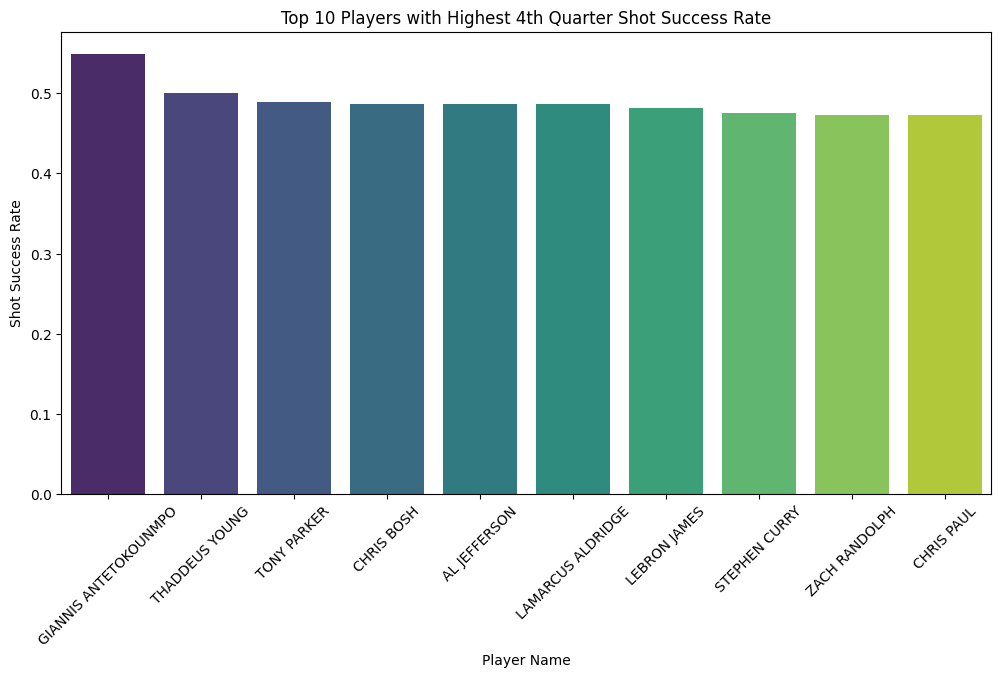

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    x='PLAYER_NAME', 
    y='SHOT_SUCCESS_RATE', 
    data=top_10_fourth_quarter_shooters.sort_values(by='SHOT_SUCCESS_RATE', ascending=False),
    palette='viridis'
)

plt.title('Top 10 Players with Highest 4th Quarter Shot Success Rate')
plt.xlabel('Player Name')
plt.ylabel('Shot Success Rate')
plt.xticks(rotation=45)  

plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-4: Most shots made

Find the 10 players with the most SHOT_MADE beyond 23 feet of the basket who played in more than 500 games.

Return a Pandas dataframe of length 10 with the following columns 

- 'PLAYER_NAME' 
- 'GAME_COUNT'  
- 'SHOTS_MADE_BEYOND_23'

In [23]:
def find_top_players_beyond_23_feet(df):
    
    shots_beyond_23 = df[df['SHOT_DISTANCE'] > 23]
    
    player_stats = (
        shots_beyond_23
        .groupby('PLAYER_NAME')
        .agg(SHOTS_MADE_BEYOND_23=('SHOT_MADE', 'sum'),
             GAME_COUNT=('GAME_ID', 'nunique'))  # Count unique games played
    )
    
    player_stats = player_stats[player_stats['GAME_COUNT'] > 500]
    
    top_players = player_stats.sort_values(by='SHOTS_MADE_BEYOND_23', ascending=False).head(10)
    
    return top_players.reset_index()

top_players_beyond_23 = find_top_players_beyond_23_feet(df)
print(top_players_beyond_23)


      PLAYER_NAME  SHOTS_MADE_BEYOND_23  GAME_COUNT
0   STEPHEN CURRY                  2643        1077
1    JAMES HARDEN                  2193        1166
2  DAMIAN LILLARD                  1993         940
3    LEBRON JAMES                  1754        1487
4   KLAY THOMPSON                  1590         851
5    KEVIN DURANT                  1543        1095
6      KYLE LOWRY                  1516        1111
7     PAUL GEORGE                  1471         922
8     ERIC GORDON                  1458         946
9     KYLE KORVER                  1455        1168


### A plot to visualize the above insight

/var/folders/xf/_sn5vxxj05nfsdm_3mlrbfz00000gn/T/ipykernel_24875/3497149336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


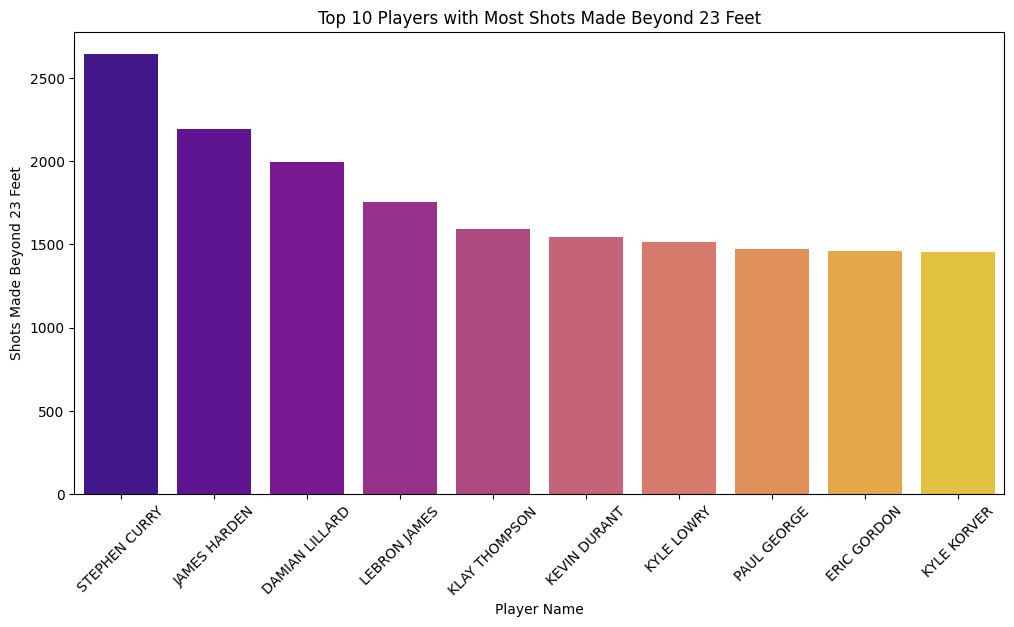

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

top_players_beyond_23 = find_top_players_beyond_23_feet(df)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='PLAYER_NAME', 
    y='SHOTS_MADE_BEYOND_23', 
    data=top_players_beyond_23.sort_values(by='SHOTS_MADE_BEYOND_23', ascending=False),
    palette='plasma'  
)

plt.title('Top 10 Players with Most Shots Made Beyond 23 Feet')
plt.xlabel('Player Name')
plt.ylabel('Shots Made Beyond 23 Feet')
plt.xticks(rotation=45)  

plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-5: Close shots made

Find the 10 players with the most SHOT_MADE within 10 feet of the basket who played in more than 500 games.

Return a Pandas dataframe of length 10 with the following columns 

- 'PLAYER_NAME' 
- 'GAME_COUNT'  
- 'SHOTS_MADE_INSIDE_10'


In [25]:
def find_top_players_within_10_feet(df):
    
    close_shots = df[df['SHOT_DISTANCE'] <= 10]
    
    player_shot_stats = (
        close_shots
        .groupby('PLAYER_NAME')
        .agg(GAME_COUNT=('GAME_ID', 'nunique'),  
             SHOTS_MADE_INSIDE_10=('SHOT_MADE', 'sum'))  
    )
    
    player_shot_stats = player_shot_stats[player_shot_stats['GAME_COUNT'] > 500]
    
    top_10_players = player_shot_stats.sort_values(by='SHOTS_MADE_INSIDE_10', ascending=False).head(10)
    
    return top_10_players.reset_index()

top_players_below_10 = find_top_players_within_10_feet(df)
print(top_players_below_10)


             PLAYER_NAME  GAME_COUNT  SHOTS_MADE_INSIDE_10
0           LEBRON JAMES        1704                  7491
1          DWIGHT HOWARD        1413                  5405
2  GIANNIS ANTETOKOUNMPO         934                  4306
3      RUSSELL WESTBROOK        1312                  4263
4            DWYANE WADE        1199                  4258
5          ZACH RANDOLPH        1154                  4009
6         THADDEUS YOUNG        1255                  3854
7              PAU GASOL        1159                  3828
8          ANTHONY DAVIS         862                  3704
9      LAMARCUS ALDRIDGE        1181                  3701


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-6: Shot Types

For each position, find the 2 most successful types of action taken during a shot (ACTION_TYPE). 

Return a dataframe with the columns:

- 'POSITION'                 
- 'ACTION_TYPE'  
- 'SUCCESSFUL_SHOTS'

In [26]:
def find_top_actions_by_position(df):
    
    action_stats = (
        df.groupby(['POSITION', 'ACTION_TYPE'])
        .agg(SUCCESSFUL_SHOTS=('SHOT_MADE', 'sum'))
        .reset_index()
    )
    
    action_stats = action_stats.sort_values(['POSITION', 'SUCCESSFUL_SHOTS'], ascending=[True, False])
    
    top_actions_by_position = action_stats.groupby('POSITION').head(2).reset_index(drop=True)
    
    return top_actions_by_position

top_actions_by_position = find_top_actions_by_position(df)
print(top_actions_by_position)


    POSITION                 ACTION_TYPE  SUCCESSFUL_SHOTS
0          C                   Jump Shot             59814
1          C                  Layup Shot             45622
2       C-PF                   Jump Shot               699
3       C-PF                  Layup Shot               438
4         PF                   Jump Shot            106647
5         PF                  Layup Shot             42812
6       PF-C                   Jump Shot               841
7       PF-C                  Layup Shot               406
8      PF-SF                   Jump Shot              1312
9      PF-SF                  Layup Shot               333
10        PG                   Jump Shot            114409
11        PG          Driving Layup Shot             47075
12     PG-SF                   Jump Shot               183
13     PG-SF          Driving Layup Shot                27
14     PG-SG                   Jump Shot              1821
15     PG-SG          Driving Layup Shot               6

### Let's visualize this using a heatmap

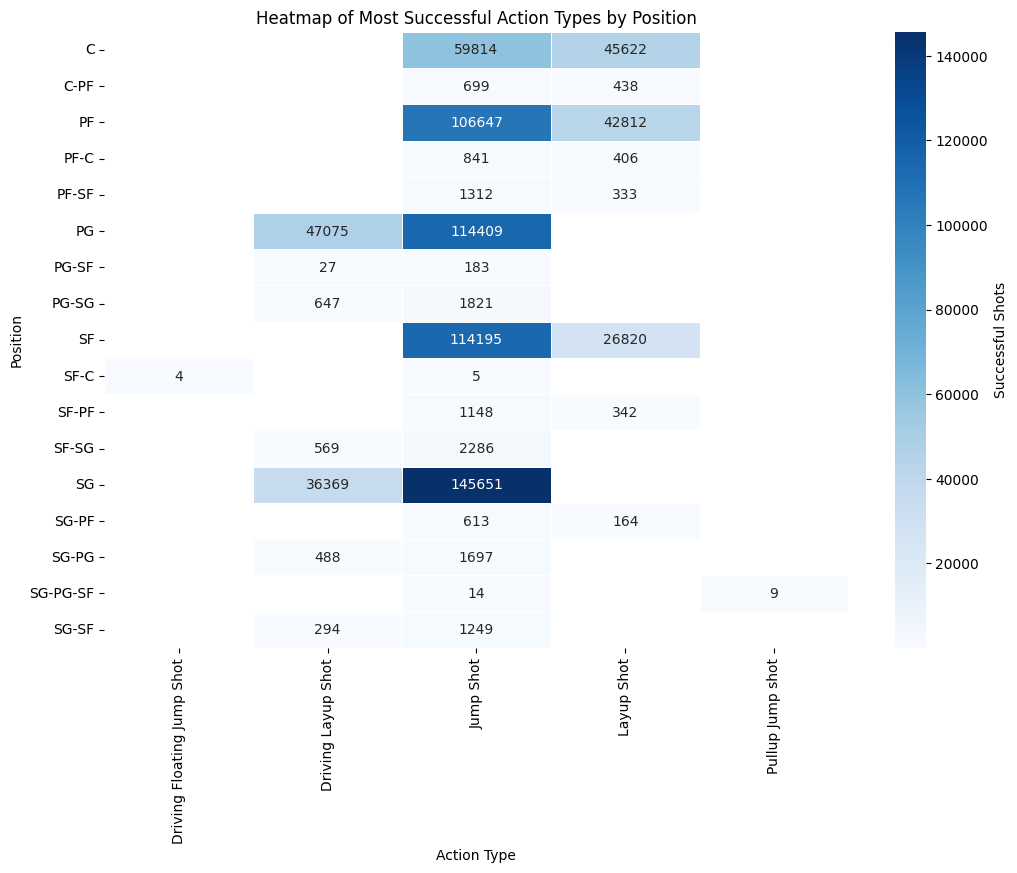

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

top_actions_by_position_pivot = top_actions_by_position.pivot(
    index='POSITION', columns='ACTION_TYPE', values='SUCCESSFUL_SHOTS'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    top_actions_by_position_pivot, 
    annot=True, 
    fmt="g", 
    cmap="Blues", 
    linewidths=.5, 
    cbar_kws={'label': 'Successful Shots'}
)

plt.title("Heatmap of Most Successful Action Types by Position")
plt.xlabel("Action Type")
plt.ylabel("Position")
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1-7: Additional Insight

One more insight of your choice. You can, for example, create a statistic that represents how **clutch** a player is. For example, how many shots they make in the last 4 minutes of the 4th quarter. You can of course choose something different, and this does not have to be at the player level - could be team-level instead. 

### Let's analyse which player misses shots the most under high pressure siuations

In [28]:
def create_high_pressure_miss_stats(df):
    high_pressure_df = df[(df['QUARTER'] == 4) & (df['MINS_LEFT'] <= 4)]

    total_shots = high_pressure_df.groupby('PLAYER_NAME').size().reset_index(name='TOTAL_SHOTS')

    high_pressure_df = high_pressure_df.merge(total_shots, on='PLAYER_NAME')
    high_pressure_df = high_pressure_df[high_pressure_df['TOTAL_SHOTS'] > 1000]

    missed_shots_df = high_pressure_df[high_pressure_df['SHOT_MADE'] == False]

    missed_shots = (
        missed_shots_df.groupby(['PLAYER_NAME', 'ACTION_TYPE'])
        .size()
        .reset_index(name='MISSED_SHOTS')
    )

    missed_shots = missed_shots.merge(total_shots, on='PLAYER_NAME')
    missed_shots['MISS_PERCENTAGE'] = (missed_shots['MISSED_SHOTS'] / missed_shots['TOTAL_SHOTS']) * 100

    final_df = missed_shots[['PLAYER_NAME', 'ACTION_TYPE', 'MISSED_SHOTS', 'TOTAL_SHOTS', 'MISS_PERCENTAGE']]
    final_df = final_df.sort_values(by='MISS_PERCENTAGE', ascending=False).reset_index(drop=True)

    return final_df

high_pressure_miss_stats_df = create_high_pressure_miss_stats(df)

print(high_pressure_miss_stats_df.head(10))


       PLAYER_NAME ACTION_TYPE  MISSED_SHOTS  TOTAL_SHOTS  MISS_PERCENTAGE
0      KOBE BRYANT   Jump Shot           842         1807        46.596569
1      JASON TERRY   Jump Shot           476         1050        45.333333
2   JAMAL CRAWFORD   Jump Shot           587         1307        44.912012
3      PAUL PIERCE   Jump Shot           452         1054        42.884250
4      JOE JOHNSON   Jump Shot           591         1390        42.517986
5    DIRK NOWITZKI   Jump Shot           587         1408        41.690341
6     LOU WILLIAMS   Jump Shot           427         1154        37.001733
7         RUDY GAY   Jump Shot           396         1079        36.700649
8     VINCE CARTER   Jump Shot           443         1210        36.611570
9  CARMELO ANTHONY   Jump Shot           598         1658        36.067551


### Lets plot this

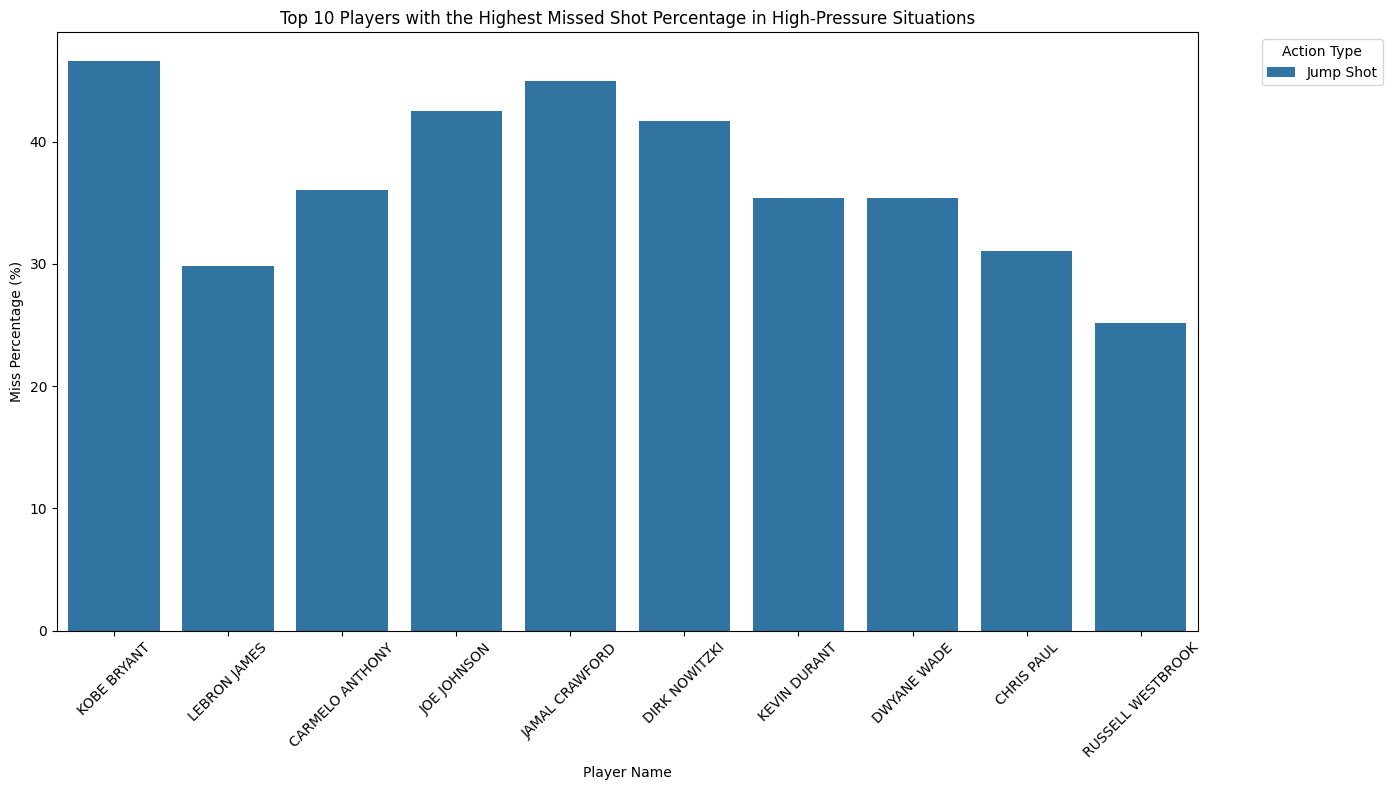

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_10_missed_shots(df):
    top_10_missed_df = df.sort_values(by='MISSED_SHOTS', ascending=False).head(10)

    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=top_10_missed_df,
        x='PLAYER_NAME', 
        y='MISS_PERCENTAGE', 
        hue='ACTION_TYPE', 
        dodge=True
    )
    
    plt.title("Top 10 Players with the Highest Missed Shot Percentage in High-Pressure Situations")
    plt.xlabel("Player Name")
    plt.ylabel("Miss Percentage (%)")
    plt.legend(title="Action Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

plot_top_10_missed_shots(high_pressure_miss_stats_df)


### Surprisingly, it's Kobe

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 2: Clustering for Player Profiles



Create player profiles based on attributes like (not limited to these):

- Shot types (SHOT_TYPE, ACTION_TYPE).
- Shot zones (BASIC_ZONE, ZONE_NAME).
- Shot success rate (SHOT_MADE).
- Shot distance (SHOT_DISTANCE).

Consider subsets of years to make the clustering faster:

- 2012-2016
- 2016-2020
- 2020-2024

Based on the metric results, pick a k-value and plot centroids over these three 4-year periods and analyze - how do the clusters change? 

Add some additional analysis based on the players included in the cluster. Does the cluster have a common trait or explanation? Can you explain outliers? Then, try to improve the silhouette score by experimenting with other features and/or dimensionality reduction techniques.

Silhouette Score for 2012-2016: 0.8415723276652438


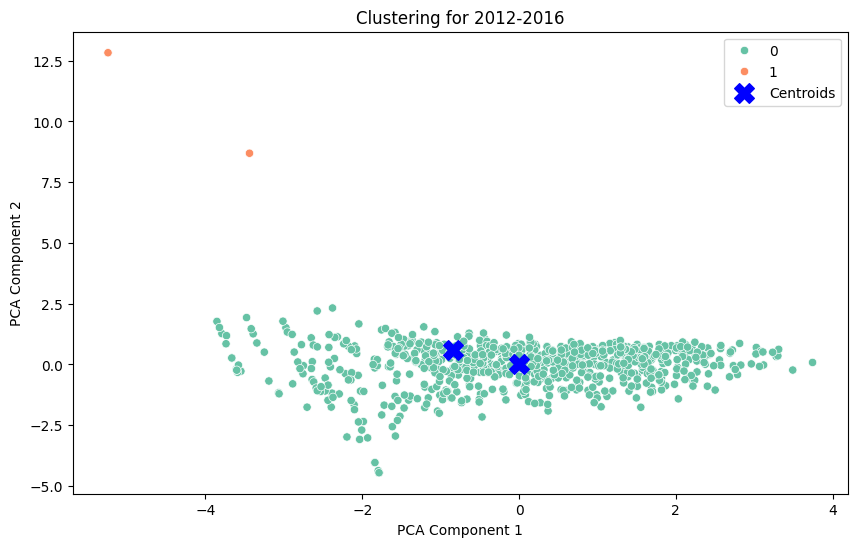

Silhouette Score for 2016-2020: 0.31485758867108676


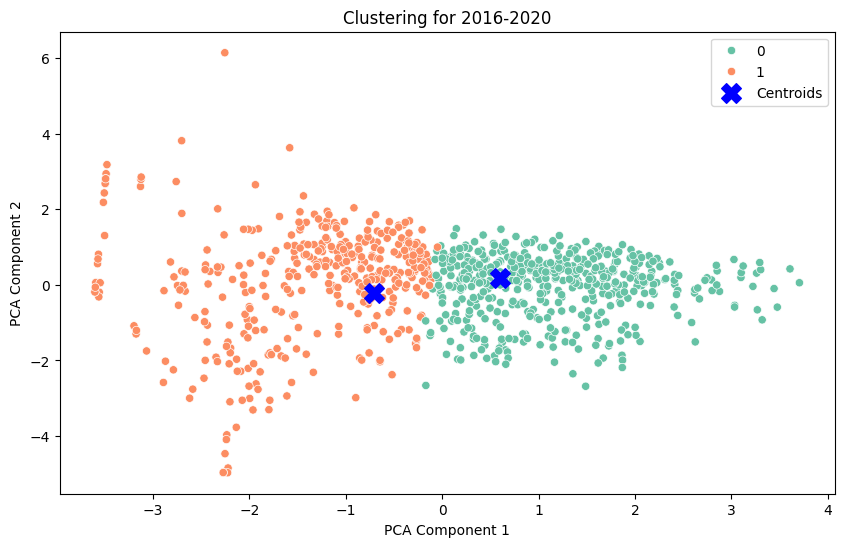

Silhouette Score for 2020-2024: 0.33266264515179944


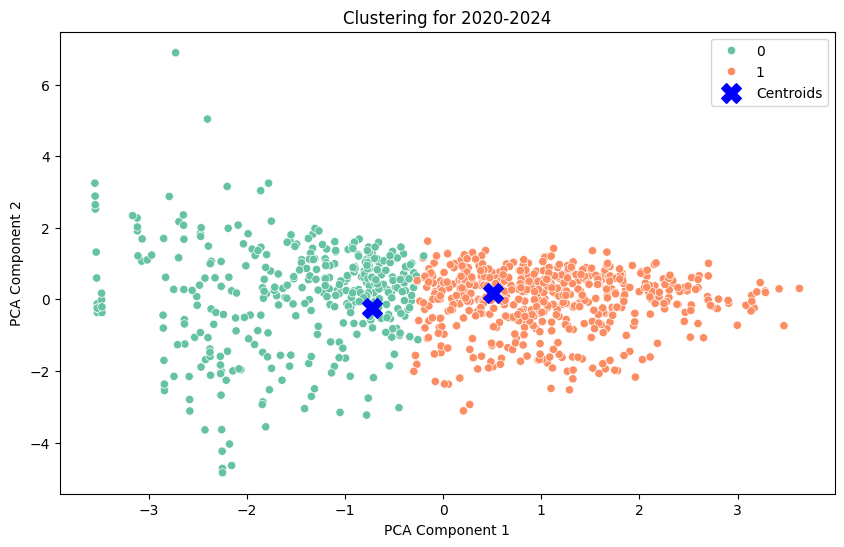

Improved Silhouette Score with PCA: 0.35952523890123683


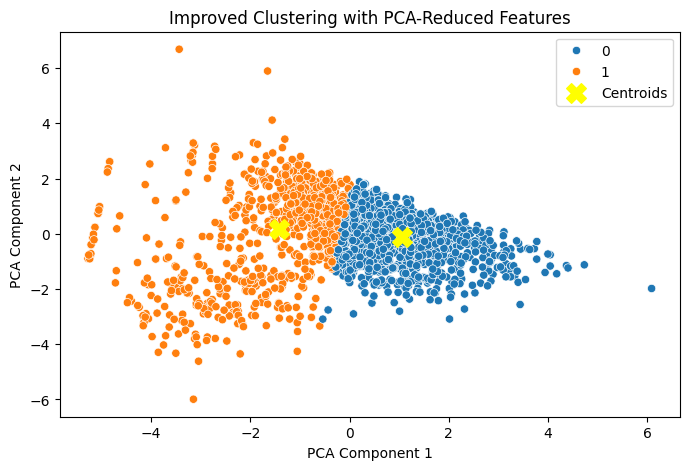

In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Filter data for each 4-year period
def filter_by_period(df, start_year, end_year):
    return df[(df['SEASON_1'] >= start_year) & (df['SEASON_1'] < end_year)]

# Aggregate player features for clustering
def get_player_features(df):
    """
    Generate player-level aggregated features for clustering.
    """
    player_features = df.groupby('PLAYER_NAME').agg(
        Shot_Count=('SHOT_TYPE', 'size'),
        Shot_Success_Rate=('SHOT_MADE', 'mean'),
        Avg_Shot_Distance=('SHOT_DISTANCE', 'mean'),
        # Count of unique action types
        Unique_Actions=('ACTION_TYPE', 'nunique'),
        # Count of unique shot zones
        Unique_Zones=('ZONE_NAME', 'nunique')
    ).reset_index()
    return player_features

# Clustering and analysis function
def perform_clustering(df, start_year, end_year, n_clusters):
    """
    Perform K-Means clustering on player features, print silhouette score, and plot cluster centroids.
    """
    # Filter and prepare data
    period_df = filter_by_period(df, start_year, end_year)
    player_features = get_player_features(period_df)

    # Scale features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(player_features.iloc[:, 1:])

    # K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_features, labels)
    print(f'Silhouette Score for {start_year}-{end_year}: {silhouette_avg}')

    # Dimensionality reduction for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(scaled_features)

    # Plot clusters and centroids
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=labels, palette="Set2", legend="full")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='blue', marker='X', s=200, label='Centroids')
    plt.title(f"Clustering for {start_year}-{end_year}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

    return kmeans, player_features, labels

# Main function to run clustering for each period
def analyze_periods(df, n_clusters=3):
    periods = [(2012, 2016), (2016, 2020), (2020, 2024)]
    results = []
    
    for start, end in periods:
        kmeans, player_features, labels = perform_clustering(df, start, end, n_clusters)
        player_features['Cluster'] = labels
        results.append((start, end, player_features, kmeans.cluster_centers_))
    
    return results

# Improved feature selection and silhouette analysis
def improve_silhouette_score(df, n_clusters=3):
    """
    Experiment with additional features and dimensionality reduction to improve silhouette score.
    """
    # Experiment with adding more granular features
    player_features = df.groupby('PLAYER_NAME').agg(
        Shot_Count=('SHOT_TYPE', 'size'),
        Shot_Success_Rate=('SHOT_MADE', 'mean'),
        Avg_Shot_Distance=('SHOT_DISTANCE', 'mean'),
        Unique_Actions=('ACTION_TYPE', 'nunique'),
        Unique_Zones=('ZONE_NAME', 'nunique'),
        Shot_Types=('SHOT_TYPE', 'nunique')
    ).reset_index()
    
    # Scale and apply PCA for dimensionality reduction
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(player_features.iloc[:, 1:])
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(scaled_features)
    
    # Cluster with reduced features
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(reduced_features)
    
    # Calculate and print silhouette score
    silhouette_avg = silhouette_score(reduced_features, labels)
    print(f"Improved Silhouette Score with PCA: {silhouette_avg}")
    
    # Plot clusters in PCA-reduced space
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=labels, palette="tab10")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', marker='X', s=200, label='Centroids')
    plt.title("Improved Clustering with PCA-Reduced Features")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

# Example usage with the DataFrame (replace `df` with your actual data)
# df = pd.read_csv("path_to_your_data.csv")

# Analyze clusters over time periods and improve silhouette score
results = analyze_periods(df, n_clusters=2)
improve_silhouette_score(df, n_clusters=2)

## Clustering Analysis

### Common Traits within Clusters

- **2012-2016 Period:**  
  The clustering shows a clear separation between two clusters, with most data points concentrated in the lower center area. This separation suggests distinct groupings that might represent players or teams with significantly different shot patterns, play styles, or performance metrics.

- **2020-2024 Period:**  
  Clusters are more evenly spread, indicating possibly more variability in player or team behaviors. The colors in the clusters suggest differences in shot success rates or play styles but with less distinction than in 2012-2016.

### Explanation of Outliers

- **2012-2016 Period:**  
  Outliers appear as individual points far from the cluster centers, particularly in the top-left area. These could represent anomalous events or unique performances by specific players who either rarely played or had extreme stats that were not characteristic of the rest of the data.

- **2020-2024 Period:**  
  Outliers are fewer but present. They may indicate unusual game events, such as a high number of attempts from an uncommon location or different tactical styles introduced.

### Improvement of Silhouette Score

- By applying PCA, the clusters seem to be better separated in the "Improved Clustering with PCA-Reduced Features" plot. The improved silhouette score from 0.3148 to 0.3595 after dimensionality reduction suggests a more meaningful grouping of similar behaviors or shot patterns.
- Further improvements to the score could involve experimenting with other feature engineering techniques, such as creating ratios or normalized statistics, or employing clustering algorithms that might better handle complex relationships.

### Overall Analysis

The analysis shows that while some separations are apparent in the earlier periods, the variability increases in later years, possibly indicating a more diverse range of player behaviors or tactics over time.


---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 3. Prediction Task (No Deep Learning)



Build a model to predict shot success (SHOT_MADE) given available features, and improve their accuracy by creating features and hyperparameter tuning. You may drop some features if you feel that they would improve your accuracy. 

You are given the train and test splits (run the first cell and look into the `datasets` folder). Note that the test file does NOT contain labels! The test.csv is what you will ultimately make predictions on. You are free to split the train.csv file into its own train-test splits as you like. 

Feature engineering can include:
- Spatial features (shot angle derived from LOC_X, LOC_Y).
- Shot difficulty: A derived feature combining SHOT_DISTANCE, LOC_X, LOC_Y, and SHOT_TYPE.
- Player fatigue: An engineered metric estimating player fatigue based on game date (GAME_DATE) and time in the game.

Prediction methods can include logistic regression, decision trees, random forests, gradient boosting, etc (including things we haven't covered!). However, you are NOT allowed to use deep learning for this task. 

Objective: Beat the benchmark accuracy score on the test set (`test.csv`). Create a submission file following the format of 'submission_example.csv' and upload to Kaggle. Kaggle will run accuracy calculation and show you how you rank amongst the submissions of others.

#### Creating the submission file. 



You should follow the format of `submission.csv` (also provided):

```{python}
submission_df = pd.read_csv("./submission.csv", index_col=0)
submission_df['SHOT_MADE'] = # your predictions
submission_df.to_csv("./submission.csv", index=True, index_label="ID")
```

Then upload the file to the Kaggle competition to get your leaderboard score. 

## Random Forest Classifier with SHOT_ANGLE, SHOT_DIFFICULTY, DAYS_SINCE_SEASON_START and GAME_DAY_OF_YEAR as new features

### Model with no extra features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

traindata = pd.read_csv('datasets/train.csv')
testdata = pd.read_csv('datasets/test.csv')

le = LabelEncoder()
traindata['SHOT_TYPE'] = le.fit_transform(traindata['SHOT_TYPE'])
traindata['ACTION_TYPE'] = le.fit_transform(traindata['ACTION_TYPE'])
traindata['ZONE_NAME'] = le.fit_transform(traindata['ZONE_NAME'])
traindata['POSITION_GROUP'] = le.fit_transform(traindata['POSITION_GROUP'])
traindata['POSITION'] = le.fit_transform(traindata['POSITION'])
traindata['BASIC_ZONE'] = le.fit_transform(traindata['BASIC_ZONE'])
traindata['ZONE_ABB'] = le.fit_transform(traindata['ZONE_ABB'])
traindata['ZONE_RANGE'] = le.fit_transform(traindata['ZONE_RANGE'])

traindata['SEASON_2'] = traindata['SEASON_2'].str[:4].astype(int)
traindata = traindata.drop(columns=['PLAYER_ID', 'GAME_ID', 'GAME_DATE', 'TEAM_NAME', 'PLAYER_NAME', 'HOME_TEAM', 'AWAY_TEAM'])

X = traindata.drop(columns=['SHOT_MADE'])
y = traindata['SHOT_MADE']
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_vali)

accuracy = accuracy_score(y_vali, y_pred)
precision = precision_score(y_vali, y_pred)
recall = recall_score(y_vali, y_pred)
f1 = f1_score(y_vali, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

Accuracy: 62.06%
Precision: 61.37%
Recall: 46.37%
F1-Score: 52.83%


### Model feature engineering

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

traindata = pd.read_csv('datasets/train.csv')
testdata = pd.read_csv('datasets/test.csv')

traindata['SHOT_ANGLE'] = np.arctan2(traindata['LOC_Y'], traindata['LOC_X'])
traindata['SHOT_DIFFICULTY'] = traindata['SHOT_DISTANCE'] * (traindata['SHOT_TYPE'] == '3PT Field Goal').astype(int)
traindata['GAME_DATE'] = pd.to_datetime(traindata['GAME_DATE'], errors='coerce')
traindata['DAYS_SINCE_SEASON_START'] = (traindata['GAME_DATE'] - traindata['GAME_DATE'].min()).dt.days
traindata['GAME_DAY_OF_YEAR'] = traindata['GAME_DATE'].dt.dayofyear 

le = LabelEncoder()
traindata['SHOT_TYPE'] = le.fit_transform(traindata['SHOT_TYPE'])
traindata['ACTION_TYPE'] = le.fit_transform(traindata['ACTION_TYPE'])
traindata['ZONE_NAME'] = le.fit_transform(traindata['ZONE_NAME'])
traindata['POSITION_GROUP'] = le.fit_transform(traindata['POSITION_GROUP'])
traindata['POSITION'] = le.fit_transform(traindata['POSITION'])
traindata['BASIC_ZONE'] = le.fit_transform(traindata['BASIC_ZONE'])
traindata['ZONE_ABB'] = le.fit_transform(traindata['ZONE_ABB'])
traindata['ZONE_RANGE'] = le.fit_transform(traindata['ZONE_RANGE'])

traindata['SEASON_2'] = traindata['SEASON_2'].str[:4].astype(int)
traindata = traindata.drop(columns=['PLAYER_ID', 'GAME_ID', 'GAME_DATE', 'TEAM_NAME', 'PLAYER_NAME', 'HOME_TEAM', 'AWAY_TEAM'])

X = traindata.drop(columns=['SHOT_MADE'])
y = traindata['SHOT_MADE']
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_vali)

accuracy = accuracy_score(y_vali, y_pred)
precision = precision_score(y_vali, y_pred)
recall = recall_score(y_vali, y_pred)
f1 = f1_score(y_vali, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Accuracy: 62.72%
Precision: 62.96%
Recall: 45.20%
F1-Score: 52.62%


## Brief Report: Impact of Adding Extra Features on Model Performance

We evaluated two models predicting basketball shot success, one with no extra features (Model 1) and one with additional features (Model 2). The extra features included `SHOT_ANGLE`, `SHOT_DIFFICULTY`, `DAYS_SINCE_SEASON_START`, and `GAME_DAY_OF_YEAR`.

### Results:

| Metric         | Model 1 (No Extra Features) | Model 2 (With Extra Features) |
|----------------|----------------------------|-------------------------------|
| **Accuracy**   | 62.06%                     | 62.72%                        |
| **Precision**  | 61.37%                     | 62.96%                        |
| **Recall**     | 46.37%                     | 45.20%                        |
| **F1-Score**   | 52.83%                     | 52.62%                        |

### Key Findings:
- **Accuracy** increased slightly (0.66%) with the added features.
- **Precision** improved by 1.59%, meaning the model became better at predicting successful shots when it said they would be successful.
- **Recall** dropped slightly (by 1.17%), suggesting a few successful shots were missed by the model.
- The **F1-Score** showed a small decrease (by 0.21%), reflecting the trade-off between improved precision and reduced recall.


### Feature Engineering Choices

1. **SHOT_ANGLE**: Represents the angle of the shot on the court, as different angles may impact shot difficulty and success rates.

2. **SHOT_DIFFICULTY**: Calculated by multiplying `SHOT_DISTANCE` with a binary indicator for 3-point shots to approximate shot difficulty, influencing success.

3. **DAYS_SINCE_SEASON_START**: Measures how far into the season each game occurs, capturing performance trends over time, such as fatigue or improvement.

4. **GAME_DAY_OF_YEAR**: Extracted as the day of the year to capture seasonal performance variations, like during holidays or playoffs.


### Encoding Categorical Variables
Categorical features (`SHOT_TYPE`, `ACTION_TYPE`, `ZONE_NAME`, etc.) were label-encoded to give the model numerical representations of shot types, court zones, and player positions, which can all impact shot success.


### Dropping Unnecessary Columns
Columns like `PLAYER_ID`, `GAME_ID`, and `TEAM_NAME` were removed as they don’t directly affect shot success or would introduce noise.


### Choosing Random Forest
The **Random Forest Classifier** was chosen because:
- It handles complex, non-linear relationships well.
- It provides feature importance insights, highlighting factors that most impact shot success.
- It’s robust against overfitting due to its ensemble approach.
- It performs well on high-dimensional data and is less sensitive to outliers.


### Summary
This feature engineering and model choice approach balances relevant positional, contextual, and categorical features to predict shot success, with Random Forest offering robust and interpretable performance.


### Conclusion:
Adding extra features improved precision and accuracy, but slightly reduced recall and F1-Score. Overall, the additional features were beneficial in making more confident and accurate predictions, though they introduced a small trade-off in recall. Further fine-tuning or additional features may lead to better overall performance.


### Hyperparametric Tuning (Optional)

In [38]:

# param_grid = {
#     'n_estimators': [100, 200],       
#     'max_depth': [10, 20],            
#     'min_samples_split': [5, 10]      
# }
# grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# best_clf = grid_search.best_estimator_
# y_pred_best = best_clf.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred_best)
# print("Validation Accuracy:", accuracy)

### Prediction over test.csv

In [ ]:
testdata['SHOT_ANGLE'] = np.arctan2(testdata['LOC_Y'], testdata['LOC_X'])
testdata['SHOT_DIFFICULTY'] = testdata['SHOT_DISTANCE'] * (testdata['SHOT_TYPE'] == '3PT Field Goal').astype(int)
testdata['GAME_DATE'] = pd.to_datetime(testdata['GAME_DATE'], errors='coerce')
testdata['DAYS_SINCE_SEASON_START'] = (pd.to_datetime(testdata['GAME_DATE']) - testdata['GAME_DATE'].min()).dt.days
testdata['GAME_DAY_OF_YEAR'] = testdata['GAME_DATE'].dt.dayofyear 

testdata['SEASON_2'] = testdata['SEASON_2'].astype(str).str[:4].astype(int)

le = LabelEncoder()
testdata['SHOT_TYPE'] = le.fit_transform(testdata['SHOT_TYPE'])
testdata['ACTION_TYPE'] = le.fit_transform(testdata['ACTION_TYPE'])
testdata['ZONE_NAME'] = le.fit_transform(testdata['ZONE_NAME'])
testdata['POSITION_GROUP'] = le.fit_transform(testdata['POSITION_GROUP'])
testdata['POSITION'] = le.fit_transform(testdata['POSITION'])
testdata['BASIC_ZONE'] = le.fit_transform(testdata['BASIC_ZONE'])
testdata['ZONE_ABB'] = le.fit_transform(testdata['ZONE_ABB'])
testdata['ZONE_RANGE'] = le.fit_transform(testdata['ZONE_RANGE'])


X_test = testdata.drop(columns=['PLAYER_ID', 'GAME_ID', 'GAME_DATE', 'TEAM_NAME', 'PLAYER_NAME', 'HOME_TEAM', 'AWAY_TEAM', 'Unnamed: 0'])
predictions = clf.predict(X_test)

In [ ]:
submission_df = pd.read_csv("./submission.csv", index_col=0)
submission_df = pd.DataFrame({'ID': testdata['Unnamed: 0'], 'SHOT_MADE': predictions})
submission_df.to_csv('submission.csv', index=False)

---

---

## Initial Model (Lower Accuracy) (Not Considered)

In [20]:
# Import necessary libraries
import pandas as pd

# Load the datasets
train_data = pd.read_csv('./datasets/train.csv')
test_data = pd.read_csv('./datasets/test.csv')

# Display the first few rows of training data
print("Training Data:")
display(train_data.head())

# Check the shape of the training data
print("\nTraining Data Shape:", train_data.shape)

# Check for missing values in training data
print("\nMissing Values in Training Data:\n", train_data.isnull().sum())

# Review data types in training data
print("\nData Types in Training Data:\n", train_data.dtypes)


Training Data:


,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2021.0,2020-21,1.610613e+09,Charlotte Hornets,1628998.0,Cody Martin,F,SF,04-28-2021,22000936.0,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,5.775,0.0,2.0,11.0,27.0
1,2015.0,2014-15,1.610613e+09,San Antonio Spurs,2225.0,Tony Parker,G,PG,NaN,21400159.0,...,Mid-Range,Right Side,R,8-16 ft.,NaN,NaN,12.0,2.0,8.0,32.0
2,2012.0,2011-12,1.610613e+09,Oklahoma City Thunder,201935.0,James Harden,G,SG,01-10-2012,21100137.0,...,Mid-Range,Right Side,R,16-24 ft.,-21.1,8.550,21.0,4.0,7.0,41.0
3,2014.0,2013-14,1.610613e+09,Sacramento Kings,203463.0,Ben McLemore,G,SG,11-15-2013,21300135.0,...,Restricted Area,Center,C,Less Than 8 ft.,0.7,7.450,2.0,1.0,5.0,14.0
4,2011.0,2010-11,1.610613e+09,Milwaukee Bucks,2422.0,John Salmons,G,SG,NaN,21000833.0,...,Left Corner 3,Left Side,L,24+ ft.,23.1,3.350,23.0,3.0,1.0,29.0



Training Data Shape: (3385009, 25)

Missing Values in Training Data:
 SEASON_1               0
SEASON_2               0
TEAM_ID                0
TEAM_NAME              0
PLAYER_ID              0
PLAYER_NAME            0
POSITION_GROUP      6371
POSITION            6371
GAME_DATE         169139
GAME_ID                0
HOME_TEAM              0
AWAY_TEAM              0
SHOT_MADE              0
ACTION_TYPE            0
SHOT_TYPE              0
BASIC_ZONE             0
ZONE_NAME              0
ZONE_ABB               0
ZONE_RANGE             0
LOC_X             169217
LOC_Y             169321
SHOT_DISTANCE          0
QUARTER                0
MINS_LEFT              0
SECS_LEFT              0
dtype: int64

Data Types in Training Data:
 SEASON_1          float64
SEASON_2           object
TEAM_ID           float64
TEAM_NAME          object
PLAYER_ID         float64
PLAYER_NAME        object
POSITION_GROUP     object
POSITION           object
GAME_DATE          object
GAME_ID           float64


In [21]:
# Drop rows with missing crucial values
train_data = train_data.dropna(subset=['LOC_X', 'LOC_Y', 'GAME_DATE', 'POSITION_GROUP', 'POSITION'])

# Confirm the changes
print("Remaining Missing Values:\n", train_data.isnull().sum())
print("\nUpdated Shape of Training Data:", train_data.shape)


Remaining Missing Values:
 SEASON_1          0
SEASON_2          0
TEAM_ID           0
TEAM_NAME         0
PLAYER_ID         0
PLAYER_NAME       0
POSITION_GROUP    0
POSITION          0
GAME_DATE         0
GAME_ID           0
HOME_TEAM         0
AWAY_TEAM         0
SHOT_MADE         0
ACTION_TYPE       0
SHOT_TYPE         0
BASIC_ZONE        0
ZONE_NAME         0
ZONE_ABB          0
ZONE_RANGE        0
LOC_X             0
LOC_Y             0
SHOT_DISTANCE     0
QUARTER           0
MINS_LEFT         0
SECS_LEFT         0
dtype: int64

Updated Shape of Training Data: (2896915, 25)


#### Feature engineering train dataset

In [22]:
import numpy as np

# 1. Calculate SHOT_ANGLE for test data
train_data['SHOT_ANGLE'] = np.arctan2(train_data['LOC_Y'], train_data['LOC_X']) * (180 / np.pi)

# 2. Calculate SHOT_DIFFICULTY_SCORE for test data
train_data['SHOT_DIFFICULTY_SCORE'] = train_data['SHOT_DISTANCE'] * np.abs(np.cos(np.radians(train_data['SHOT_ANGLE'])))

# 3. Calculate FATIGUE for test data
# Assuming 'MINS_LEFT' and 'SECS_LEFT' exist in the test data and represent time left in the game
train_data['FATIGUE'] = (train_data['MINS_LEFT'] * 60 + train_data['SECS_LEFT']) / 48  # Assuming 48 minutes game duration

# difficulty_map = {
#     'Restricted Area': 1,  # Easy shots (close to the basket)
#     'Mid-Range': 2,         # Moderate difficulty
#     'Left Corner 3': 3,     # Harder shots (from the corners)
#     'Right Corner 3': 3,
#     'Top of the Key': 3,    # Harder shots (further distance)
#     'Above the Break 3': 3
# }
# train_data['ZONE_DIFFICULTY'] = train_data['BASIC_ZONE'].map(difficulty_map)


#### NaN values handling

In [26]:
from sklearn.impute import SimpleImputer

# Ensure GAME_DATE is in datetime format
test_data['GAME_DATE'] = pd.to_datetime(test_data['GAME_DATE'], errors='coerce')

# Select columns
numerical_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = test_data.select_dtypes(include=['object']).columns

# Impute numerical columns with the mean
numerical_imputer = SimpleImputer(strategy='mean')  # 'median' could be used as an alternative
test_data[numerical_cols] = numerical_imputer.fit_transform(test_data[numerical_cols])

# Impute categorical columns with the most frequent value (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
test_data[categorical_cols] = categorical_imputer.fit_transform(test_data[categorical_cols])

# For GAME_DATE, we handle missing dates manually
most_frequent_date = test_data['GAME_DATE'].mode()[0]  # Get the most frequent date
test_data['GAME_DATE'] = test_data['GAME_DATE'].fillna(most_frequent_date)

# Check for any remaining NaN values
print(test_data.isnull().sum())


Unnamed: 0        0
SEASON_1          0
SEASON_2          0
TEAM_ID           0
TEAM_NAME         0
PLAYER_ID         0
PLAYER_NAME       0
POSITION_GROUP    0
POSITION          0
GAME_DATE         0
GAME_ID           0
HOME_TEAM         0
AWAY_TEAM         0
ACTION_TYPE       0
SHOT_TYPE         0
BASIC_ZONE        0
ZONE_NAME         0
ZONE_ABB          0
ZONE_RANGE        0
LOC_X             0
LOC_Y             0
SHOT_DISTANCE     0
QUARTER           0
MINS_LEFT         0
SECS_LEFT         0
dtype: int64


#### feature engineering of test

In [28]:
import numpy as np

# 1. Calculate SHOT_ANGLE for test data
test_data['SHOT_ANGLE'] = np.arctan2(test_data['LOC_Y'], test_data['LOC_X']) * (180 / np.pi)

# 2. Calculate SHOT_DIFFICULTY_SCORE for test data
test_data['SHOT_DIFFICULTY_SCORE'] = test_data['SHOT_DISTANCE'] * np.abs(np.cos(np.radians(test_data['SHOT_ANGLE'])))

# 3. Calculate FATIGUE for test data
# Assuming 'MINS_LEFT' and 'SECS_LEFT' exist in the test data and represent time left in the game
test_data['FATIGUE'] = (test_data['MINS_LEFT'] * 60 + test_data['SECS_LEFT']) / 48  # Assuming 48 minutes game duration

# difficulty_map = {
#     'Restricted Area': 1,  # Easy shots (close to the basket)
#     'Mid-Range': 2,         # Moderate difficulty
#     'Left Corner 3': 3,     # Harder shots (from the corners)
#     'Right Corner 3': 3,
#     'Top of the Key': 3,    # Harder shots (further distance)
#     'Above the Break 3': 3
# }
# test_data['ZONE_DIFFICULTY'] = test_data['BASIC_ZONE'].map(difficulty_map)

#### Drop unwanted cols from both 

In [31]:
# # List of columns to drop
# columns_to_drop = [
#     'SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID', 'PLAYER_NAME',
#     'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID', 'HOME_TEAM', 'AWAY_TEAM',
#     'ACTION_TYPE', 'ZONE_NAME', 'ZONE_ABB'
# ]

# # Drop columns from both train_data and test_data
# train_data_cleaned = train_data.drop(columns=columns_to_drop)
# test_data_cleaned = test_data.drop(columns=columns_to_drop)


In [34]:
# Drop the 'Unnamed: 0' column from test_data_cleaned
test_data = test_data.drop(columns=['Unnamed: 0'])
test_data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,SHOT_ANGLE,SHOT_DIFFICULTY_SCORE,FATIGUE
0,2019.0,2018-19,1.610613e+09,Memphis Grizzlies,202685.0,Jonas Valanciunas,C,C,2022-04-10,21800916.0,...,Less Than 8 ft.,-1.60,12.389849,5.000000,4.0,3.0,59.0,97.358337,6.403723e-01,4.979167
1,2009.0,2008-09,1.610613e+09,Utah Jazz,2246.0,Mehmet Okur,C,C,2008-12-05,20800286.0,...,Less Than 8 ft.,2.40,7.850000,3.139855,1.0,8.0,4.0,72.999906,9.180096e-01,10.083333
2,2006.0,2005-06,1.610613e+09,New Orleans/Oklahoma City Hornets,101108.0,Chris Paul,G,PG,2005-11-12,20500085.0,...,24+ ft.,-0.00,30.050000,24.000000,4.0,8.0,39.0,90.000000,1.469576e-15,10.812500
3,2024.0,2023-24,1.610613e+09,Los Angeles Lakers,1629020.0,Jarred Vanderbilt,F,PF,2023-12-31,22300446.0,...,Less Than 8 ft.,-1.00,6.250000,1.000000,1.0,6.0,12.0,99.090277,1.579905e-01,7.750000
4,2020.0,2019-20,1.610613e+09,New York Knicks,201961.0,Wayne Ellington,G,SG,2019-10-25,21900019.0,...,24+ ft.,1.84,7.495000,25.000000,4.0,3.0,56.0,76.206839,5.960438e+00,4.916667


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define categorical and numerical columns
categorical_columns = ['SHOT_TYPE', 'BASIC_ZONE', 'ZONE_RANGE']
numerical_columns = ['LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'SHOT_ANGLE', 'SHOT_DIFFICULTY_SCORE', 'FATIGUE']

# Create a column transformer for the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns),  # Apply OneHotEncoding to categorical columns
        ('num', StandardScaler(), numerical_columns)    # Apply StandardScaler to numerical columns
    ])

# Split your data into X (features) and y (target)
X = train_data.drop('SHOT_MADE', axis=1)  # Drop the target column from X
y = train_data['SHOT_MADE']  # The target is 'SHOT_MADE'

# Apply the transformations to the features using the preprocessor
X_transformed = preprocessor.fit_transform(X)

# Check the transformed shape
print(X_transformed.shape)


(2896915, 20)


In [37]:
# Split the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(2317532, 20) (579383, 20) (2317532,) (579383,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)

print(f"Accuracy on validation set: {accuracy:.4f}")


Accuracy on validation set: 0.5570


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Question 4: Optional (Bonus) Advanced visualizations and analysis


This is an optional problem worth 5 bonus points. It is an open-ended question. We are asking you to create a single novel and possibly interactive visualization
that shows an interesting insight into the data. Some examples could be:

- a shot heatmap for players or teams,
- game-winning (or tying) clutch shot analysis
- career makes from a particular player shown on a court graphic
- progression of shots from a particular player (or players at a particular position) over time

However you are free to design this yourself. Earning the bonus should be beyond the scope of a simple EDA and should involve a few steps of analysis prior to the visualization. 

Your plots should be on a professional level visually. This means they should have proper labels, titles, legends, and the font sizes should make the visualization clear.

Since this part is more open-ended than the others, it is optional. 

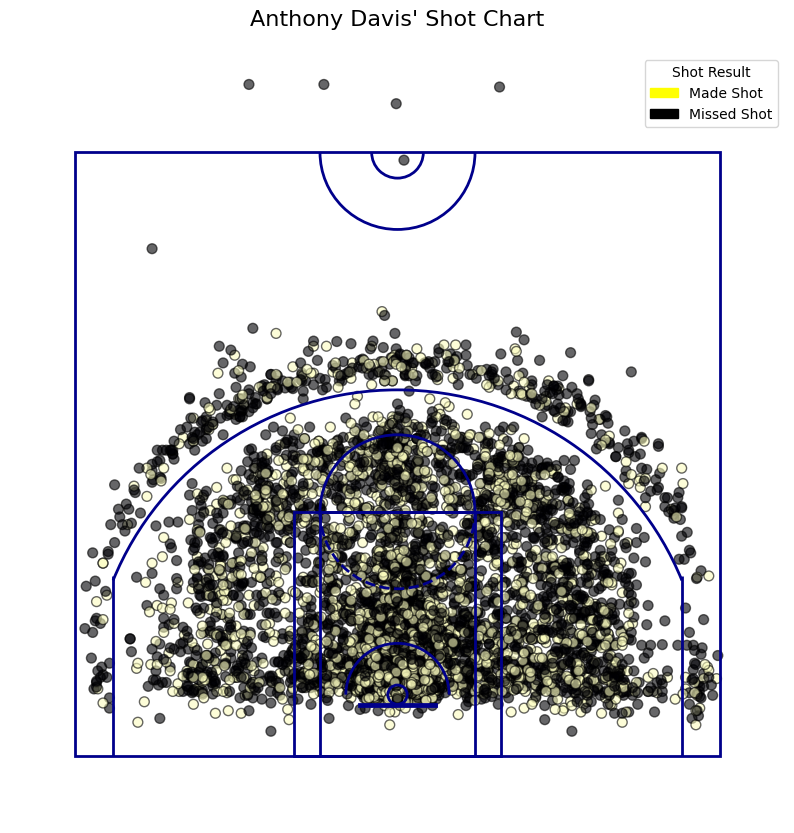

In [52]:
from utils import draw_court
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define Anthony Davis' player ID (replace with the player's actual ID if needed)
bryant_id = 203076
game_df = df[df['PLAYER_ID'] == bryant_id]

# Set up the figure size
plt.figure(figsize=(10, 10))

# Plot the shot locations with customizations
sc = plt.scatter(game_df['LOC_X'] * 10, (game_df['LOC_Y'] - 5) * 10, 
                 c=game_df['SHOT_MADE'], cmap='magma', alpha=0.6, edgecolor='k', s=50)

# Draw the basketball court with custom color
draw_court(outer_lines=True, color="darkblue")

# Set court boundaries
plt.xlim(-300, 300)
plt.ylim(-100, 500)

# Add title and labels
plt.title("Anthony Davis' Shot Chart", fontsize=16, color='black', pad=20)
plt.xlabel("Court X Position", fontsize=12)
plt.ylabel("Court Y Position", fontsize=12)

# Add legend for made and missed shots
made_patch = mpatches.Patch(color='yellow', label='Made Shot')
missed_patch = mpatches.Patch(color='black', label='Missed Shot')
plt.legend(handles=[made_patch, missed_patch], loc='upper right', title="Shot Result")

# Remove axes for a cleaner look
plt.axis('off')

# Display the plot
plt.show()


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)